In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
df=pd.read_csv("milknew.csv")

In [3]:
df

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,high
1,6.6,36,0,1,0,1,253,high
2,8.5,70,1,1,1,1,246,low
3,9.5,34,1,1,0,1,255,low
4,6.6,37,0,0,0,0,255,medium
...,...,...,...,...,...,...,...,...
1054,6.7,45,1,1,0,0,247,medium
1055,6.7,38,1,0,1,0,255,high
1056,3.0,40,1,1,1,1,255,low
1057,6.8,43,1,0,1,0,250,high


In [4]:
df.shape

(1059, 8)

In [5]:
df.columns

Index(['pH', 'Temprature', 'Taste', 'Odor', 'Fat ', 'Turbidity', 'Colour',
       'Grade'],
      dtype='object')

In [6]:
df.duplicated().sum()

976

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df.reset_index(drop=True,inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83 entries, 0 to 82
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pH          83 non-null     float64
 1   Temprature  83 non-null     int64  
 2   Taste       83 non-null     int64  
 3   Odor        83 non-null     int64  
 4   Fat         83 non-null     int64  
 5   Turbidity   83 non-null     int64  
 6   Colour      83 non-null     int64  
 7   Grade       83 non-null     object 
dtypes: float64(1), int64(6), object(1)
memory usage: 5.3+ KB


In [10]:
df.describe().round()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour
count,83.0,83.0,83.0,83.0,83.0,83.0,83.0
mean,7.0,44.0,0.0,0.0,1.0,0.0,251.0
std,1.0,9.0,1.0,0.0,0.0,0.0,5.0
min,3.0,34.0,0.0,0.0,0.0,0.0,240.0
25%,6.0,38.0,0.0,0.0,0.0,0.0,247.0
50%,7.0,41.0,0.0,0.0,1.0,0.0,255.0
75%,7.0,45.0,1.0,1.0,1.0,1.0,255.0
max,10.0,90.0,1.0,1.0,1.0,1.0,255.0


In [11]:
df.isna().sum()

pH            0
Temprature    0
Taste         0
Odor          0
Fat           0
Turbidity     0
Colour        0
Grade         0
dtype: int64

<AxesSubplot:>

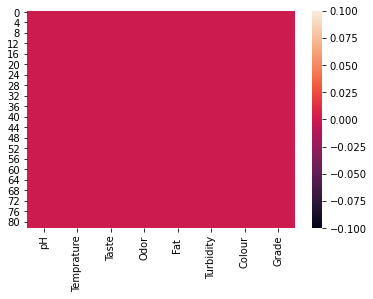

In [12]:
sns.heatmap(df.isna())

In [13]:
df['Grade'].value_counts()

medium    34
low       26
high      23
Name: Grade, dtype: int64

In [15]:
Grade=pd.get_dummies(df['Grade'],drop_first=True)
Grade

,low,medium
0,0,0
1,0,0
2,1,0
3,1,0
4,0,1
...,...,...
78,0,0
79,0,1
80,0,0
81,0,1


In [16]:
df=pd.concat([df,Grade],axis=1)

In [17]:
df.drop("Grade",axis=1,inplace=True)

In [18]:
df.drop('medium',axis=1,inplace=True)

In [20]:
df.rename({'low':'grade'},axis=1,inplace=True)

In [22]:
df['pH'].value_counts()

6.6    25
6.8    19
6.5    16
6.7     5
3.0     2
7.4     2
8.5     2
4.5     2
8.6     2
9.0     2
5.5     1
6.4     1
4.7     1
8.1     1
5.6     1
9.5     1
Name: pH, dtype: int64

<AxesSubplot:>

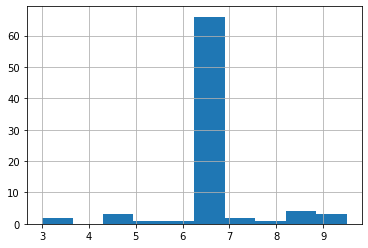

In [74]:
df['pH'].hist()

In [24]:
df['Temprature'].value_counts()

45    16
38    11
40    11
43     6
50     6
37     6
36     5
41     4
55     4
35     4
34     3
70     2
42     1
60     1
65     1
66     1
90     1
Name: Temprature, dtype: int64

<AxesSubplot:xlabel='Temprature', ylabel='Count'>

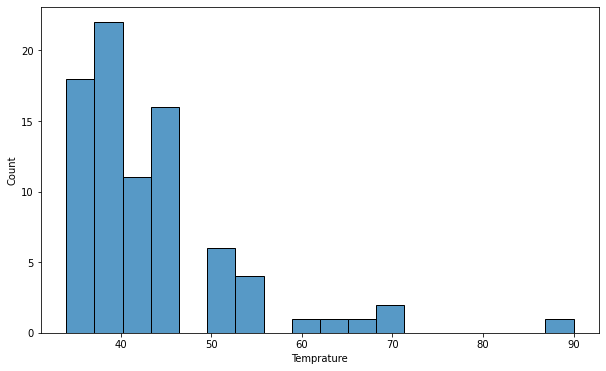

In [45]:
plt.figure(figsize=(10,6))
sns.histplot(data=df,x='Temprature')

In [26]:
df['Taste'].value_counts()

0    42
1    41
Name: Taste, dtype: int64

<AxesSubplot:xlabel='Taste', ylabel='count'>

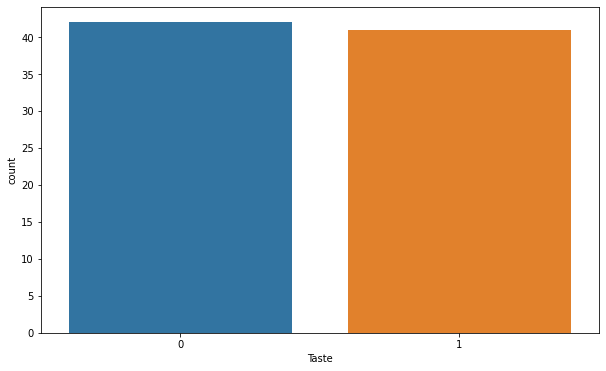

In [44]:
plt.figure(figsize=(10,6))
sns.countplot(data=df,x='Taste')

In [28]:
df['Odor'].value_counts()

0    50
1    33
Name: Odor, dtype: int64

<AxesSubplot:xlabel='Odor', ylabel='count'>

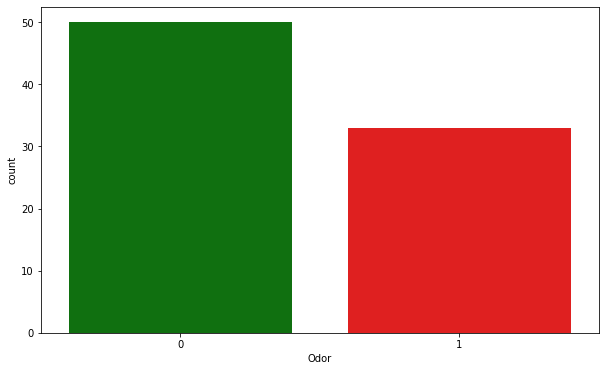

In [43]:
plt.figure(figsize=(10,6))
sns.countplot(data=df,x='Odor',palette=['g','r'])

In [30]:
df['Turbidity'].value_counts()

0    47
1    36
Name: Turbidity, dtype: int64

<AxesSubplot:ylabel='Turbidity'>

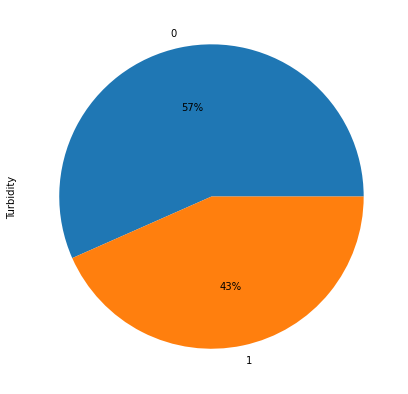

In [31]:
plt.figure(figsize=(10,7))
df['Turbidity'].value_counts().plot.pie(autopct='%.0f%%')

In [32]:
df['Colour'].value_counts()

255    43
250    13
245     8
246     7
240     4
247     3
253     3
248     1
254     1
Name: Colour, dtype: int64

<AxesSubplot:xlabel='Colour', ylabel='Count'>

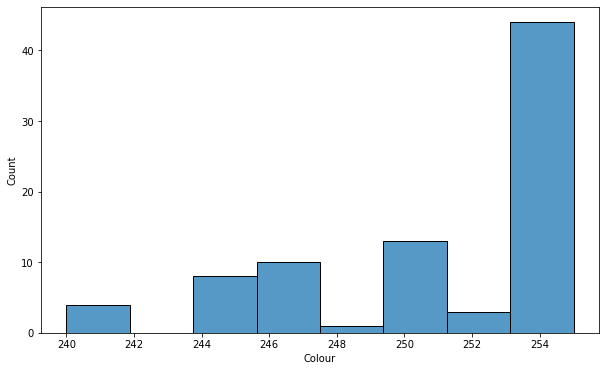

In [42]:
plt.figure(figsize=(10,6))
sns.histplot(data=df,x='Colour')

In [35]:
df['grade'].value_counts()

0    57
1    26
Name: grade, dtype: int64

<AxesSubplot:xlabel='grade', ylabel='count'>

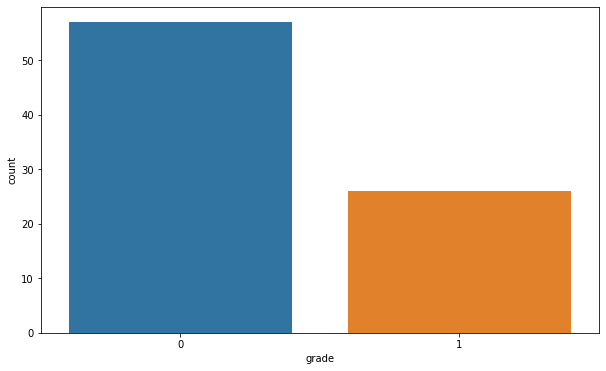

In [46]:
plt.figure(figsize=(10,6))
sns.countplot(data=df,x='grade')

<AxesSubplot:xlabel='grade', ylabel='count'>

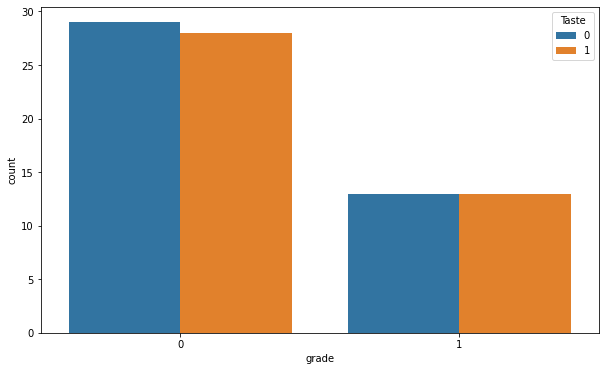

In [47]:
plt.figure(figsize=(10,6))
sns.countplot(data=df,x='grade',hue='Taste')

<AxesSubplot:xlabel='Turbidity', ylabel='count'>

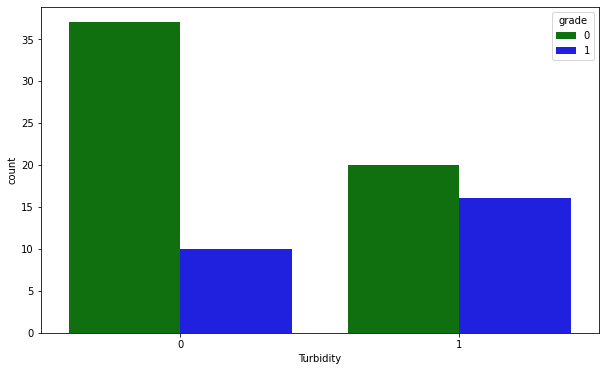

In [48]:
plt.figure(figsize=(10,6))
sns.countplot(data=df,x='Turbidity',hue='grade',palette=['g','b'])

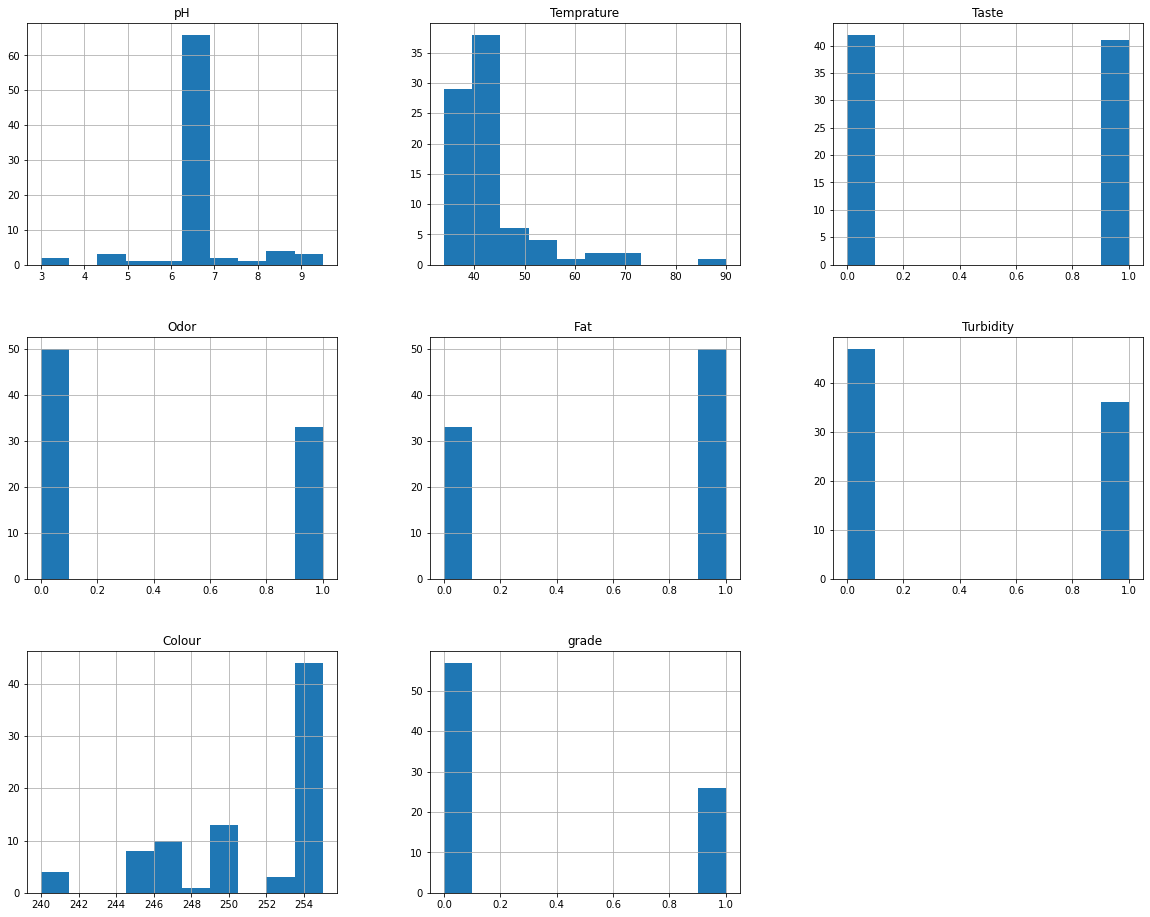

In [49]:
df.hist(figsize=(20,16))
plt.show()

<AxesSubplot:>

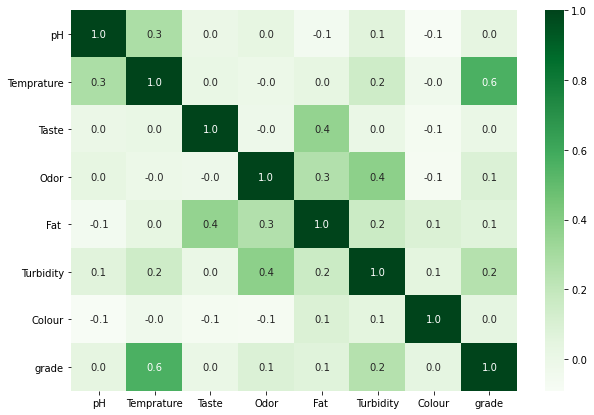

In [50]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),annot=True,fmt='.1f',cmap='Greens')

# MODEL

In [51]:
X=df.drop("grade",axis=1)
y=df['grade']

In [52]:
X

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour
0,6.6,35,1,0,1,0,254
1,6.6,36,0,1,0,1,253
2,8.5,70,1,1,1,1,246
3,9.5,34,1,1,0,1,255
4,6.6,37,0,0,0,0,255
...,...,...,...,...,...,...,...
78,6.6,38,0,1,1,1,255
79,6.6,45,1,0,0,1,255
80,6.8,41,1,1,1,0,255
81,6.5,45,1,0,0,0,246


In [53]:
y

0     0
1     0
2     1
3     1
4     0
     ..
78    0
79    0
80    0
81    0
82    0
Name: grade, Length: 83, dtype: uint8

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [56]:
 X_train.shape, X_test.shape, y_train.shape, y_test.shape

((55, 7), (28, 7), (55,), (28,))

In [92]:
from sklearn.ensemble import RandomForestClassifier

In [93]:
model=RandomForestClassifier()

In [94]:
model.fit(X_train,y_train)

RandomForestClassifier()

In [95]:
pre=model.predict(X_test)
pre

array([0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0], dtype=uint8)

In [96]:
y_test.values

array([0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0], dtype=uint8)

In [107]:
from sklearn.metrics import roc_auc_score

In [108]:
roc_auc_score(pre,y_test)

0.9285714285714286